In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import roc_curve
df = pd.read_csv("resumes_cleaned_363.csv")
df

,Job Title,Cleaned Resume Text
0,Program Coordinator,Professional Experience Training Program Assis...
1,Test Coordinator,SUMMARY OF QUALIFICATIONS Maintained customer ...
2,Engineering Technician,Objective RampD Assembly and Test Operator Cha...
3,EMC Test Engineer,SUMMARY An EMC Test Engineer with years of ext...
4,Exercise Physiologist,Hello Im currently working on a degree in Spor...
...,...,...
358,Registered Nurse,EDUCATION University of California Los Angeles...
359,Program Manager,Professional Summary years of professional exp...
360,Engineering Project Manager,P R O F I L E A passionate Project Manager wit...
361,Technical Program Manager,Technical Operations Program Manager Business ...


## create y's

In [3]:
d = {}
for i in range(len(df)):
    title = df["Job Title"][i]
    d[title] = d.get(title, 0) + 1

l2 = []
for i in range(len(df)):
    title = df["Job Title"][i] 
    title = title.title()   
    n1 = re.search(r'Software',title)
    n2 = re.search(r'Engineer',title)
    n3 = re.search(r'Data',title)
    n4 = re.search(r'QA',title)
    n5 = re.search(r'Dev',title)
    n6 = re.search(r'UX',title)
    n7 = re.search(r'Test',title)
    n8 = re.search(r'Analysis',title)
    n9 = re.search(r'Design',title)
    n10 = re.search(r'ML',title)
    n11 = re.search(r'ML',title)
    n12 = re.search(r'ML',title)
    n13 = re.search(r'ML',title)
    if n1 != None or n2 !=None or n3 !=None or n4 !=None or n5 !=None \
    or n6 !=None or n7 !=None or n8 !=None or n9 !=None or n10 !=None:
        l2.append("engineer")
    else:
        l2.append("other")
df["title2"] = l2
    

l3 = []
for i in range(len(df)):
    title = df["Job Title"][i] 
    title = title.title()
    temp = "other"
    m1 = re.search(r'Study',title)
    if m1 != None:
        temp = "study"
    n1 = re.search(r'Software',title)
    n2 = re.search(r'Engineer',title)
    n3 = re.search(r'Data',title)
    n4 = re.search(r'Qa',title)
    n5 = re.search(r'Dev',title)
    n6 = re.search(r'UX',title)
    n7 = re.search(r'Test',title)
    n8 = re.search(r'Analysis',title)
    n9 = re.search(r'Design',title)
    n10 = re.search(r'Ml',title)
    if n1 != None or n2 !=None or n3 !=None or n4 !=None or n5 !=None \
    or n6 !=None or n7 !=None or n8 !=None or n9 !=None or n10 !=None:
        temp = "engineer"    
    o1 = re.search(r'Nurse',title)
    o2 = re.search(r'Physiologist',title)
    o3 = re.search(r'Scribe',title)
    o4 = re.search(r'Medical',title)
    o5 = re.search(r'Surgical',title)  
    o6 = re.search(r'Paramedic',title)  
    o7 = re.search(r'Hospital',title)  
    if o1 != None or o2 !=None or o3 !=None or o4 !=None or o5 !=None or o6 !=None \
    or o7 !=None:
        temp = "medical"
    l3.append(temp)
df["title3"] = l3
    
    
l4 = []
for i in range(len(df)):
    title = df["Job Title"][i]  
    if d[title] < 6:
        temp = 'unassigned'
    else:
        temp = title
    l4.append(temp)
df["title4"] = l4

    
print(l2)
print(df['title2'].value_counts())
print(df['title3'].value_counts())
print(df['title4'].value_counts(), len(df['title4'].value_counts()))
print(len(df['Job Title'].value_counts()))


['other', 'engineer', 'engineer', 'engineer', 'other', 'other', 'engineer', 'other', 'engineer', 'other', 'engineer', 'engineer', 'engineer', 'other', 'other', 'engineer', 'other', 'other', 'other', 'other', 'other', 'other', 'engineer', 'engineer', 'other', 'other', 'engineer', 'engineer', 'other', 'engineer', 'other', 'other', 'engineer', 'engineer', 'other', 'other', 'other', 'engineer', 'other', 'engineer', 'engineer', 'other', 'engineer', 'other', 'other', 'other', 'other', 'other', 'other', 'engineer', 'engineer', 'engineer', 'engineer', 'other', 'engineer', 'engineer', 'other', 'other', 'engineer', 'other', 'engineer', 'engineer', 'engineer', 'engineer', 'other', 'other', 'engineer', 'engineer', 'other', 'other', 'engineer', 'engineer', 'engineer', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'engineer', 'engineer', 'engineer', 'other', 'engineer', 'other', 'other', 'engineer', 'engineer', 'engineer', 'other', 'engineer', 'other', 'other', 'other', 'en

## Create X

In [4]:
class BigDict:
    def __init__(self, data):
        self.d = {}
        self.df = pd.DataFrame()
        for i in range(0,len(data),1):
            self.addwords(data['Cleaned Resume Text'][i])
        self.addcols()  
        self.addrows(data)
        
    def addwords(self, data):
        words = data.split(" ")
        for word in words:
            self.d[word]  = self.d.get(word, 0) + 1
    
    def __repr__(self):
        return ("\nword count: " + str(len(self.d)) + "\n" + str(self.df))
    
    def getresx(self, restext):
        words = restext.split(" ")
        columns = self.d.keys()
        d = {}
        for key in columns:
            d[key] = 0
        for word in words:
            d[word] = d.get(word) + 1
        return d
    
    
    def addcols(self):
        l = []
        for key in self.d.keys():
            l.append(key)
        df2 = pd.DataFrame(columns=l)
        self.df = pd.concat([self.df,df2], axis=1)
        
    
    def addrows(self, data):
        for i in range( len(data)):
            record = self.getresx(data['Cleaned Resume Text'][i])
            self.df.loc[i] = record
        
    def getdf(self):
        return self.df
    
x1 = BigDict(df)
print(x1)


word count: 22938
     Professional  Experience  Training  Program  Assistant  Christian  \
0               1           1         1        1          1          4   
1               0           0         0        0          0          0   
2               0           1         0        0          0          0   
3               0           0         0        0          0          0   
4               0           2         0        1          1          0   
..            ...         ...       ...      ...        ...        ...   
358             0           0         0        0          1          0   
359             1           1         2        0          0          0   
360             0           0         0        0          0          0   
361             1           1         0        7          0          0   
362             1           0         0        0          0          0   

     Family  Care  Completed  Foster  ...  Lawrenceville  remedied  Makita  \
0         4   

## LSQ

In [5]:
class LSQClassifier(BaseEstimator, ClassifierMixin):
    """
    LSQClassifier()
    
    Least-squares (aka pseudoinverse) classifier. 
    
    Parameters
    ----------
    None
    
    Attributes
    ----------
    classes_ : ndarray of shape (n_classes,)
        The unique classes labels.

    n_classes_ : int
        The number of unique classes labels.

    intercept_ : ndarray of shape = (1, ) if n_classes == 2 else (n_classes, )
        Constants in decision function.

    coef_ : ndarray of shape = (1, n_features) if n_classes == 2 else (n_classes, n_features)
        Weights assigned to the features.

    classifier_ : ndarray of shape = (1, 1 + n_features) if n_classes == 2 else (n_classes, 1 + n_features)
        Constant and weights assigned to the features.

    keslerdict_ : dict of length n_classes
        Dictionary associating class labels to one-hot codes using values +1 & -1

    """
    def __init__(self):
        pass
        
    def fit(self, X, y):
        self.classes_ = np.unique(y) # Determine unique class labels
        self.n_classes_ = len(self.classes_) # Determine number of classes
        self.keslerdict_ = {c:[1 if c==u else -1 for u in self.classes_] for c in self.classes_}
        y_ohe = np.array([self.keslerdict_[label] for label in y]) # Create one hot encoded version of y

        if self.n_classes_ == 2: # Binary case has to be handled differently
            y_ohe = y_ohe[:, [1]]

        Xa = np.c_[np.ones(len(X)),X] # Augment X
        Xapi = np.linalg.pinv(Xa) # Pseudoinverse of Xa

        self.classifier_ = np.dot(Xapi, y_ohe).T # Least-squares or pseudoinverse classifier (Transpose of W in lecture notes)
        
        self.intercept_ = self.classifier_[:, 0] # Needed to maintain compatibility with other sklearn classifiers
        self.coef_ = self.classifier_[:, 1:] # Needed to maintain compatibility with other sklearn classifiers

        return self
    
    def predict(self, X):
        Xa = np.c_[np.ones(len(X)),X] # Augment X
        y_out = np.dot(Xa, self.classifier_.T)  # Compute raw output
        
        if self.n_classes_ == 2: # Handle binary case
            inv_kesler = {v[1]: k for k, v in self.keslerdict_.items()}
            #[f(x) if condition else g(x) for x in sequence]
            sign_y_out = [+1 if y >= 0 else -1 for y in np.squeeze(y_out)]
            y_pred = np.array([inv_kesler[s] for s in sign_y_out])
        else: # Handle multiclass case
            y_pred = self.classes_[np.argmax(y_out, axis=1)]
        return y_pred
    
    def decision_function(self, X):
        Xa = np.c_[np.ones(len(X)),X] # Augment X
        y_out = np.dot(Xa, self.classifier_.T)  # Compute raw output
        
        if self.n_classes_ == 2: # Handle binary case
            y_dec_fun = np.squeeze(y_out)
        else: # Handle multiclass case
            y_dec_fun = y_out

        return y_dec_fun
    
    

## Least Squares Classifier two classes

accuracy:  0.7032967032967034


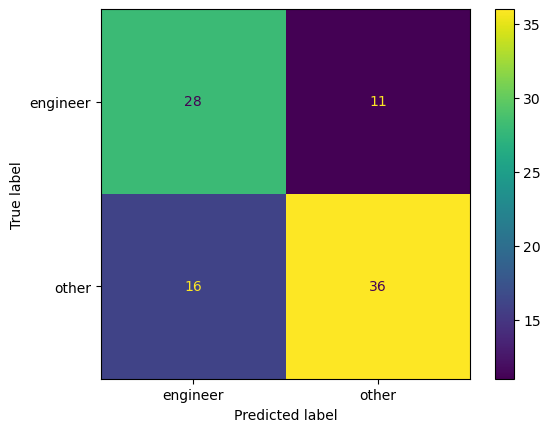

In [6]:
y2 = df['title2']
x = x1.getdf()

x2train, x2test, y2train, y2test = train_test_split(x, y2, test_size=0.25, random_state=0)

clf_LSQ2 = LSQClassifier() # Instantiate 
clf_LSQ2.fit(x2train, y2train) # Fit

ypred2 = clf_LSQ2.predict(x2test) # Predict
acc2 = clf_LSQ2.score(x2test, y2test)
print("accuracy: ", acc2)


ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y2test, ypred2), display_labels=clf_LSQ2.classes_).plot()
plt.show()

## Least Squares Classifier four classes

accuracy:  0.7362637362637363


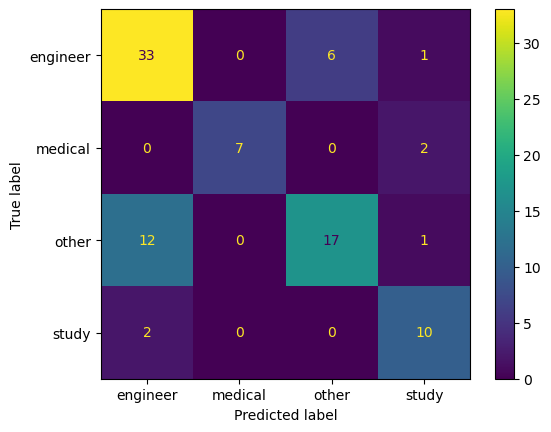

In [7]:
y3 = df['title3']
x = x1.getdf()

x3train, x3test, y3train, y3test = train_test_split(x, y3, test_size=0.25, random_state=0)

clf_LSQ3 = LSQClassifier() # Instantiate 
clf_LSQ3.fit(x3train, y3train) # Fit

ypred3 = clf_LSQ3.predict(x3test) # Predict
acc3 = clf_LSQ3.score(x3test, y3test)
print("accuracy: " , acc3)


ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y3test, ypred3), display_labels=clf_LSQ3.classes_).plot()
plt.show()


## Least Squares Classifier fourteen classes 

accuracy:  0.6373626373626373


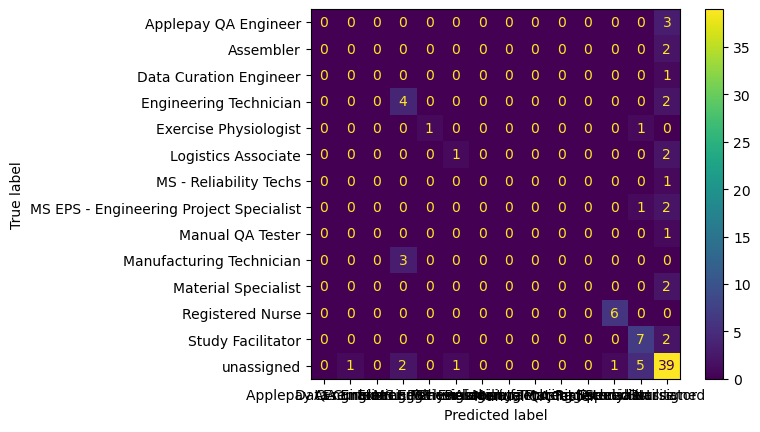

In [8]:
y4 = df['title4']
x = x1.getdf()

x4train, x4test, y4train, y4test = train_test_split(x, y4, test_size=0.25, random_state=0)

clf_LSQ4 = LSQClassifier() # Instantiate 
clf_LSQ4.fit(x4train, y4train) # Fit

ypred4 = clf_LSQ4.predict(x4test) # Predict
acc4 = clf_LSQ4.score(x4test, y4test)
print("accuracy: " , acc4)


ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y4test, ypred4), display_labels=clf_LSQ4.classes_).plot()
plt.show()
